In [1]:
using DFTK
using Plots
using LinearAlgebra

# Day 3 - Morning

## Band Theory and Density Functional Theory

We need to make good approximations...

- don't let the ions move
- symmetry
    - translation
    - others (rotations, inversion, etc.)
    
- treatment of valence electrons (core vs. valence)

- pseudopotentials

**Symmetry**

- translational
- everything else

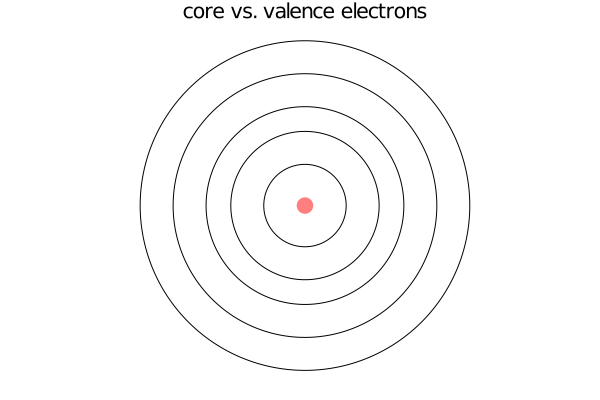

In [24]:
function circle(x, y, r)
    θ = LinRange(0, 2*π, 500)
    x .+ r*sin.(θ), y .+ r*cos.(θ)
end;
p = plot(circle(0,0,2.0), seriestype=[:shape], lw=1, legend=false, axis=nothing, grid=false, c=:white, linecolor=:black, aspect_ratio=1);
plot!(p, circle(0,0,1.6), seriestype=[:shape], lw=1, legend=false, axis=nothing, grid=false, c=:white, linecolor=:black, aspect_ratio=1);
plot!(p, circle(0,0,1.2), seriestype=[:shape], lw=1, legend=false, axis=nothing, grid=false, c=:white, linecolor=:black, aspect_ratio=1);
plot!(p, circle(0,0,0.9), seriestype=[:shape], lw=1, legend=false, axis=nothing, grid=false, c=:white, linecolor=:black, aspect_ratio=1);
plot!(p, circle(0,0,0.5), seriestype=[:shape], lw=1, legend=false, axis=nothing, grid=false, c=:white, linecolor=:black, aspect_ratio=1);
plot!(p, circle(0,0,0.1), seriestype=[:shape], lw=0, legend=false, axis=nothing, grid=false, c=:red, linecolor=:red, fillalpha=0.5, aspect_ratio=1);
plot!(title = "core vs. valence electrons")
plot!(showaxis=false)

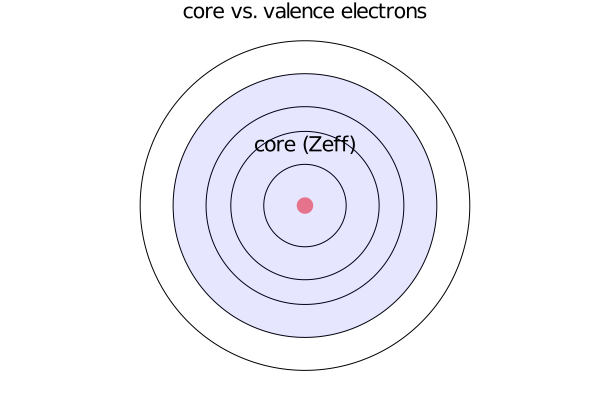

In [25]:
plot!(p, circle(0,0,1.6), seriestype=[:shape], lw=0, legend=false, axis=nothing, grid=false, c=:blue, linecolor=:blue, fillalpha=0.1, aspect_ratio=1);
annotate!(p, 0, 0.75, "core (Zeff)")
plot!(showaxis=false)

### Energy bands

Electrons in a crystal form energy bands. These bands have different characteristics and give us insight into the how the material is behaving.

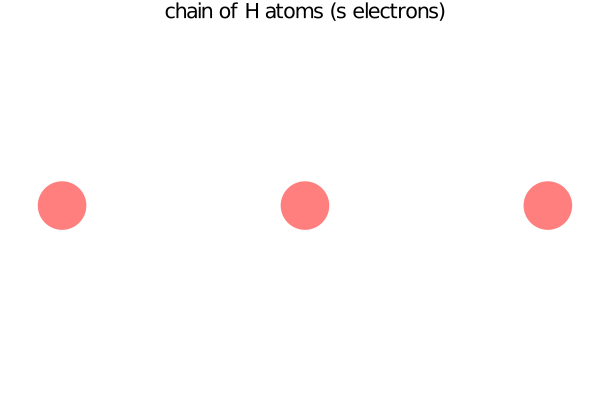

In [26]:
atoms = plot(circle(0,0,0.1), seriestype=[:shape], lw=0, legend=false, axis=nothing, grid=false, c=:red, linecolor=:red, fillalpha=0.5, aspect_ratio=1);
plot!(atoms, circle(-1.0,0,0.1), seriestype=[:shape], lw=0, legend=false, axis=nothing, grid=false, c=:red, linecolor=:red, fillalpha=0.5, aspect_ratio=1);
plot!(atoms, circle(1.0,0.0,0.1), seriestype=[:shape], lw=0, legend=false, axis=nothing, grid=false, c=:red, linecolor=:red, fillalpha=0.5, aspect_ratio=1);
plot!(title="chain of H atoms (s electrons)")
plot!(showaxis=false)

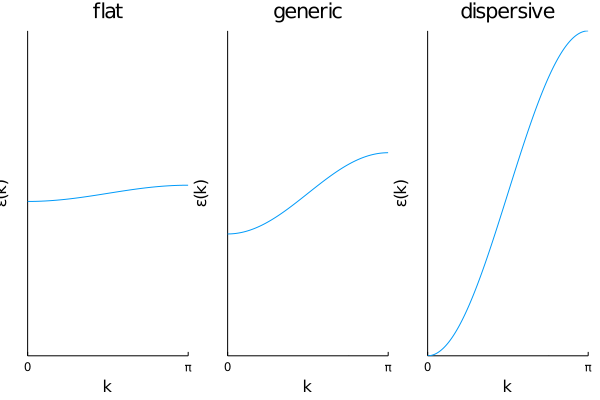

In [27]:
kx = collect(0:0.01:π)
generic = plot(kx, -0.5.*cos.(kx))
disperse = plot(kx, -2 .* cos.(kx))
flat = plot(kx, -0.1 .* cos.(kx))
plot(flat, generic, disperse, layout = (1,3), legend=false, ylim = (-2, 2), ylabel="ε(k)", xlabel="k", grid=false)
plot!(xticks=([0:π:2*π;], ["0", "\\pi"]), xlim=(0, π),yticks=false)
plot!(titles=["flat" "generic" "dispersive"])

## summary of bands
- bands tell us alot of what's going!
    - flat bands = atoms are localized
    - dispersive bands = atoms are strongly interacting

## Density functional theory

A theory and computational tool to calculate the ground state properties of a solid.

- a theory that combines everything that we've discussed together and offers a set of equations that can be solved self-consistently

**Key idea**: Take a hard interacting problem that can be mapped onto an easy non-interacting problem

- we know how to go back and forth between easy and hard problem
- we don't know how exactly how to fake the interactions
- Everything depends on the density of electrons, but sometimes important information is carried in subtle changes in the electron density

1. Electron density $\rho$
2. Plug into Kohn-Sham (DFT) equations and solve
3. Get out new $\rho$
4. Check $|\rho_{out} - \rho_{in}| < \text{tolerance}$
5. If no, repeat. Otherwise converged!

**learn by example (and by doing this afternoon)**

Goal: put it all together to see how we get a metal and an insulator. This morning, we will look at a metal (Na).

**Na**

- Sodium (Na) has one valence electron (3s$^{1}$) and 10 core electrons (1s$^{2}$2s$^{2}$2p$^{6}$)
- Each unit cell only has one Na atom

A friendly material for identifying key features.

- Each band can carry 2 electrons
- one electron per cell

**Prediction:** we expect there to be one band 1/2 filled on average. What does this look?

In [36]:
a = 3.715/0.53;
lattice = [[a 0 0]; [0 a 0]; [0 0 a]];
Na = ElementPsp(:Na, psp=load_psp(:Na, functional="lda"));
atoms = [Na => [zeros(3)]];
model = model_LDA(lattice, atoms, temperature=0.01);
basis = PlaneWaveBasis(model, 15, kgrid=[10, 10, 10]);
scfres=self_consistent_field(basis);

n     Free energy       Eₙ-Eₙ₋₁     ρout-ρin   Diag
---   ---------------   ---------   --------   ----
  1   -0.232499949634         NaN   1.02e-02    1.3 
  2   -0.232527210731   -2.73e-05   2.25e-03    1.0 
  3   -0.232529826853   -2.62e-06   1.16e-04    3.0 
  4   -0.232529833140   -6.29e-09   6.33e-06    2.8 


Computing bands along kpath:
       Γ -> X -> M -> Γ -> R -> X  and  M -> R


Diagonalising Hamiltonian kblocks: 100%|████████████████| Time: 0:00:09


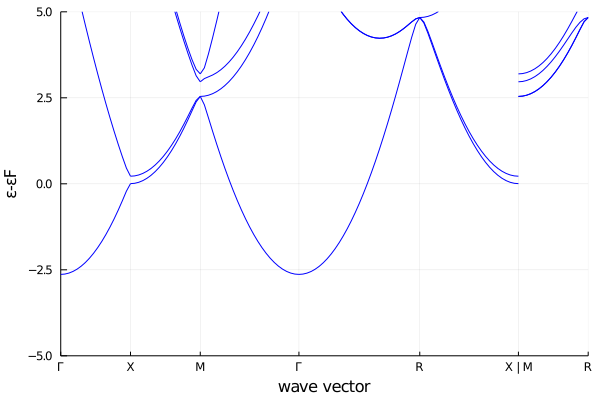

In [40]:
bands = plot_bandstructure(scfres, kline_density=20)
ylims!(bands, (-5, 5))
ylabel!("ε - εF")

In [52]:
println("Avg. occupation: $(sum(hcat(scfres.occupation...)[1, :])/length(hcat(scfres.occupation...)[1, :]))")

Avg. occupation: 1.0230504191199128


A **metallic** is system is one who's bands are partially filled!

An **insulating** system is one who's bands are fully filled!